# Entrega laboratorio 3

## Integrantes 

- Javier Steven Barrera Toro - 202214779
- Julian Santiago Rolon Toloza - 202215839

In [2]:
# Install sympy if not already installed
%pip install sympy

from matplotlib import pyplot as plt
from typing import List, Tuple, NewType
import numpy as np
import pandas as pd
import sympy as sp


   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ----------- ---------------------------- 1.8/6.2 MB 9.6 MB/s eta 0:00:01
   ---------------------- ----------------- 3.4/6.2 MB 7.9 MB/s eta 0:00:01
   ------------------------------ --------- 4.7/6.2 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 6.2/6.2 MB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
   ---------------------------------------- 536.2/536.2 kB 7.2 MB/s eta 0:00:00


# Problema 1

En este punto se nos pide implementar el método Netwon-Raphson para encontrar los extremos locales de la función $f(x) = 3x^3 - 10x^2 - 56 x + 50$ dentro del intervalo $[-6, 6]$. La siguiente gráfica corresponde a la función de la cual se desean hallar los extremos locales. 

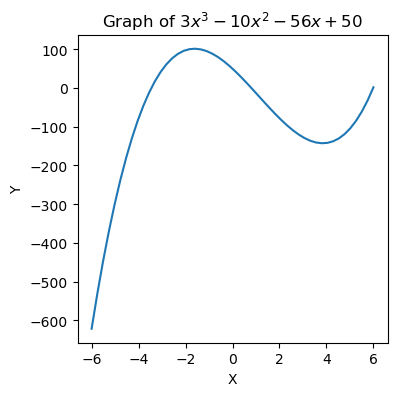

In [ ]:
X = np.linspace(-6, 6, 50)
Y = 3 * X ** 3 - 10 * X ** 2 - 56 * X + 50

plt.figure(figsize=(4, 4))
plt.plot(X, Y)
plt.title('Graph of $3x^3 - 10x^2 - 56x + 50$')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Implementación del algoritmo de Newton-Raphson

La siguiente implementación calcula las derivadas y las segundas derivadas utilizando Sympy, lo cual facilita la definición de la misma función. 

In [ ]:
def newton_raphson(initial_guess: int, tolerance: float, N_max: int, alpha: float, function) -> Tuple[float, int]:
    """Function to execute the 1D Newton-Raphson method given a function in Sympy format.

    Args:
        initial_guess (int): The initial guess for the minimum value of the function.
        tolerance (float): The tolerance for the minimum value of the function.
        N_max (int): The maximum number of iterations to be executed.
        alpha (float): The alpha value for the Newton-Raphson method.
        function (): The function to be minimized in Sympy format.

    Returns:
        Tuple[float, int]: The minimum value of the function.
    """
    k = 0
    x = [initial_guess]

    derivative = sp.lambdify('x', sp.diff(function, 'x'), 'numpy')
    double_derivative = sp.lambdify('x', sp.diff(sp.diff(function), 'x'), 'numpy')

    while k < N_max:
        f_prime_val = derivative(x[k])
        if abs(f_prime_val) < tolerance:
            break
        
        f_double_prime_val = double_derivative(x[k])
        if f_double_prime_val == 0:
            raise ValueError("The second derivative is zero.")

        d_k = - alpha * f_prime_val / f_double_prime_val
        
        x.append(x[k] + d_k)
        k += 1
    
    return x[-1], k

In [ ]:
function = sp.simplify('3*x**3 - 10*x**2 - 56*x + 50')
function

3*x**3 - 10*x**2 - 56*x + 50

## Calculo análitico de las derivadas de $f(x)$

Calculemos las derivadas de manera análitica para el método de 1 dimensión. Dada $f(x) = 3x^3 - 10x^2 - 56 x + 50$, la derivada $f'(x)$ es:
$$
9x^2 - 20x - 56
$$

Asimismo, la segunda derivada $f^{(2)}(x)$ de la función corresponde a:
$$
18x - 20
$$

## Diferentes valores iniciales $x_0$

En el siguiente código se puede observar que para distintos valores iniciales se llegan a dos puntos extremos, aproximadamente $1.61$ y $3.84$. 

In [ ]:
x_0 = np.arange(-6, 7, 1)
mins = [newton_raphson(x, 1e-8, 100, 0.05, function)[0] for x in x_0]
mins = list(map(lambda x: round(x, 2), mins))
mins

[np.float64(-1.67),
 np.float64(-1.65),
 np.float64(-1.64),
 np.float64(-1.63),
 np.float64(-1.62),
 np.float64(-1.62),
 np.float64(-1.61),
 np.float64(-1.61),
 np.float64(3.83),
 np.float64(3.84),
 np.float64(3.84),
 np.float64(3.85),
 np.float64(3.86)]

Esto se verifica en la siguiente gráfica, en el cual para valores enteros de -6 a 6 obtenemos que se llegan a estos puntos extremos. 

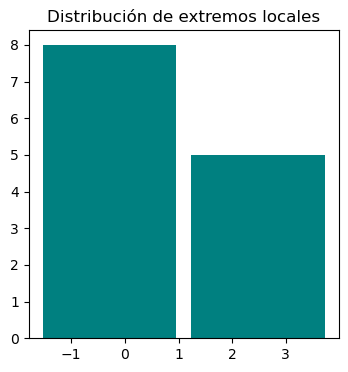

In [ ]:
plt.figure(figsize=(4,4))
plt.title('Distribución de extremos locales')
plt.hist(mins, bins=2, rwidth=0.9, color='teal')
plt.show()

## Diferentes valores iniciales de $\alpha$

Para probar como varia el proceso de optimización en base al factor de paso $\alpha$ se van a utilizar diferentes valores del mismo y luego se revisará cuantos pasos y si se converge a un mismo valor. Como se puede ver en la siguiente celda de código se coverge al mismo valor $-1.6$. Además se puede observar que para distintos factores de paso se llega al mismo punto, la diferencia significativa esta en la cantidad de pasos necesarios para llegar a la solución. Para un factor de paso de 0.01 se utilizan 1969 pasos y para un factor de 1.02 se utilizan unicamente 6 pasos, ambos llegando a la misma solución.

In [ ]:
alphas = np.linspace(0.01, 1.3, 15)

mins = [newton_raphson(-6, 1e-6, 2000, alpha, function)[0] for alpha in alphas]
steps = [newton_raphson(-6, 1e-6, 2000, alpha, function)[1] for alpha in alphas]

pd.DataFrame({
    'Alfa': list(map(lambda x: round(float(x), 2), alphas)),
    'Min. val': list(map(lambda x: round(float(x), 1), mins)),
    'Pasos': steps
})

,Alfa,Min. val,Pasos
0,0.01,-1.6,1969
1,0.10,-1.6,185
2,0.19,-1.6,93
3,0.29,-1.6,60
4,0.38,-1.6,43
5,0.47,-1.6,32
6,0.56,-1.6,25
7,0.66,-1.6,20
8,0.75,-1.6,16
9,0.84,-1.6,12


## Gráfica con los puntos encontrados

En la siguiente gráfica se pueden observar los extremos locales hallados para diferentes puntos iniciales. En esta gráfica se puede observar que se convergen a los dos puntos antes mencionados. 

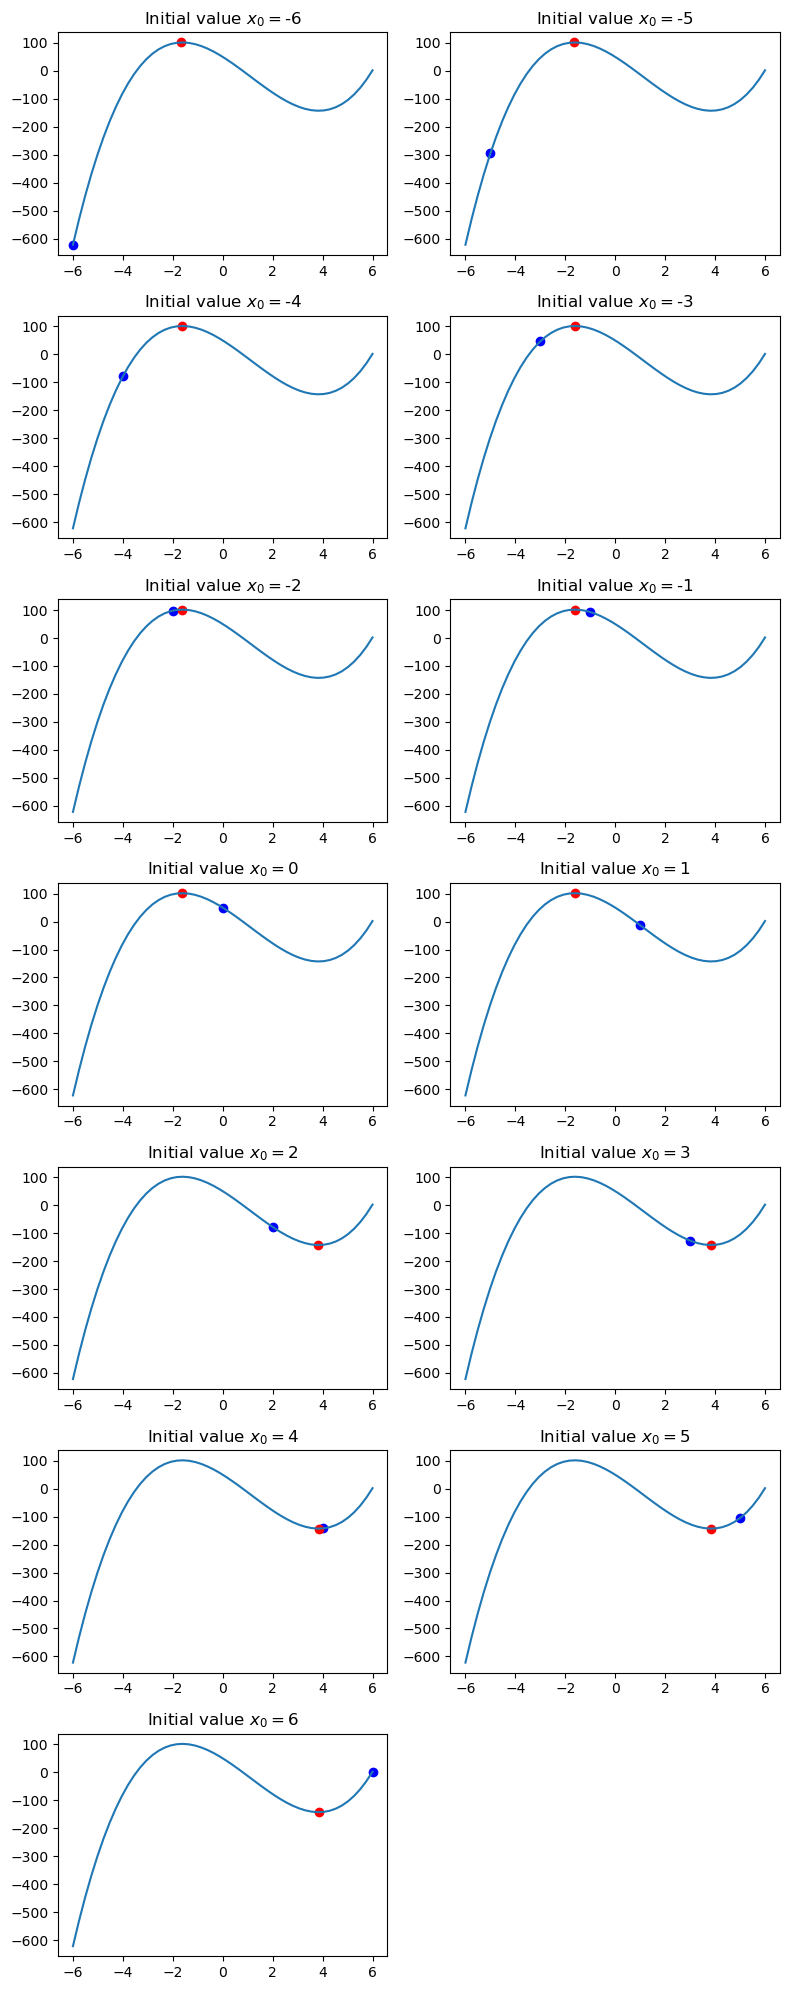

In [ ]:
X = np.linspace(-6, 6, 50)
Y = 3 * X ** 3 - 10 * X ** 2 - 56 * X + 50

plt.figure(figsize=(8,20), tight_layout=True)

for i, x in enumerate(x_0):
    x_min = newton_raphson(x, 1e-6, 100, 0.05, function)[0]

    plt.subplot(7, 2, i + 1)
    plt.plot(X, Y)
    plt.scatter(x, 3 * x ** 3 - 10 * x ** 2 - 56 * x + 50, color='blue')
    plt.scatter(x_min, 3 * x_min ** 3 - 10 * x_min ** 2 - 56 * x_min + 50, color='red')
    plt.title(f'Initial value $x_0 = ${x}')

## Análisis del comportamiento de convergencia

**TODO**

# Problema 2

In [4]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve, lambdify

En este punto se nos pide implementar el método Netwon-Raphson para encontrar los extremos locales de la función $f(x) = x^5 - 8x^3 + 10x +6$ dentro del intervalo $[-3, 3]$. La siguiente gráfica corresponde a la función de la cual se desean hallar los extremos locales.

In [ ]:
function = sp.simplify('x**5 - 8*x**3 + 10 * x + 6')
function

x**5 - 8*x**3 + 10*x + 6

La gráfica de la función a la cual se le quieren hallar los extremos locales es la siguiente.

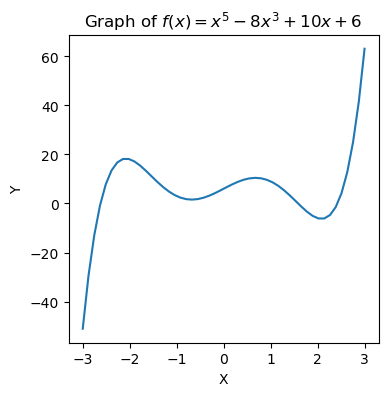

In [ ]:
X = np.linspace(-3, 3, 50)
Y = X ** 5 - 8 * X ** 3 + 10 * X + 6

plt.figure(figsize=(4,4))
plt.plot(X, Y)
plt.title("Graph of $f(x) = x^5 - 8 x^3 + 10 x + 6$")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Derivadas de $f(x)$

Dado que $f(x) = x^5 - 8x^3 + 10 x + 6$ la primera derivada de la función se presenta a continuación:
$$
f'(x) = 5x^4 - 24 x^2 + 10
$$

Asimismo, la segunda derivada de la función es:
$$
f^{(2)}(x) = 20x^3 - 48x
$$

En base a los resultados que obtenemos definimos $x$ y sus derivadas de la siguiente forma

In [25]:
x = symbols('x')
f = x**5 - 8*x**3 + 10*x + 6  # Definición de la función
f_prime = diff(f, x)  # Primera derivada
def_second = diff(f_prime, x)  # Segunda derivada


In [26]:
f_func = lambdify(x, f, 'numpy')
f_prime_func = lambdify(x, f_prime, 'numpy')
f_second_func = lambdify(x, def_second, 'numpy')


In [27]:
def newton_raphson(func_prime, func_second, x0, tol=1e-6, max_iter=100):
    x_current = x0
    for _ in range(max_iter):
        f_prime_val = func_prime(x_current)
        f_second_val = func_second(x_current)
        if abs(f_prime_val) < tol:  # Verificar convergencia
            break
        if f_second_val == 0:  # Evitar división por cero
            raise ValueError("La derivada segunda es cero en x = {:.4f}".format(x_current))
        x_current -= f_prime_val / f_second_val
    return x_current

In [28]:
interval = np.linspace(-3, 3, 1000)  # Intervalo de graficación
initial_points = [-2.5, -1.5, 0, 1.5, 2.5]  # Puntos iniciales para Newton-Raphson

# Encontrar extremos locales usando los puntos iniciales
extremos_locales = []
for x0 in initial_points:
    try:
        extremo = newton_raphson(f_prime_func, f_second_func, x0)
        if not any(np.isclose(extremo, e, atol=1e-4) for e in extremos_locales):
            extremos_locales.append(extremo)
    except ValueError as e:
        print(e)

La derivada segunda es cero en x = 0.0000


In [29]:
clasificacion = []
for extremo in extremos_locales:
    f_second_val = f_second_func(extremo)
    if f_second_val > 0:
        clasificacion.append((extremo, "Mínimo local"))
    elif f_second_val < 0:
        clasificacion.append((extremo, "Máximo local"))
    else:
        clasificacion.append((extremo, "Punto de inflexión"))

In [30]:
valores_extremos = [(extremo, f_func(extremo)) for extremo in extremos_locales]
minimo_global = min(valores_extremos, key=lambda x: x[1])
maximo_global = max(valores_extremos, key=lambda x: x[1])

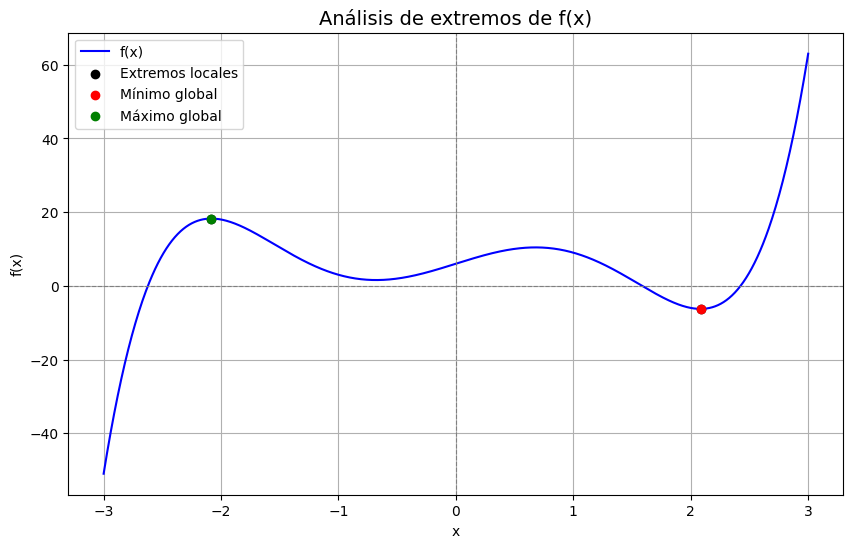

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(interval, f_func(interval), label='f(x)', color='blue')
plt.scatter([e[0] for e in valores_extremos], [e[1] for e in valores_extremos], color='black', label='Extremos locales')
plt.scatter(minimo_global[0], minimo_global[1], color='red', label='Mínimo global', zorder=5)
plt.scatter(maximo_global[0], maximo_global[1], color='green', label='Máximo global', zorder=5)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Análisis de extremos de f(x)', fontsize=14)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


In [32]:
# Resultados
print("Extremos locales y su clasificación:")
for extremo, tipo in clasificacion:
    print(f"x = {extremo:.4f}, {tipo}")

print(f"\nMínimo global: x = {minimo_global[0]:.4f}, f(x) = {minimo_global[1]:.4f}")
print(f"Máximo global: x = {maximo_global[0]:.4f}, f(x) = {maximo_global[1]:.4f}")

Extremos locales y su clasificación:
x = -2.0830, Máximo local
x = 2.0830, Mínimo local

Mínimo global: x = 2.0830, f(x) = -6.2588
Máximo global: x = -2.0830, f(x) = 18.2588


La gráfica presentada en el análisis de los extremos de la función 
𝑓(𝑥) nos permite observar el comportamiento de los puntos críticos en el intervalo analizado. Debido a los resultados obtenidos podemos concluir lo siguiente:

- En primer lugar, los extremos locales están representados con puntos negros en la gráfica. Estos indican los valores en los que la derivada de la función es igual a cero, pero no necesariamente representan el máximo o mínimo global. En estos puntos, el cambio de la función se detiene temporalmente, permitiendo identificar regiones de interés para un análisis más profundo.

- El mínimo global, resaltado en rojo, corresponde al valor más bajo de la función dentro del rango evaluado. Este punto es crucial, ya que indica el nivel mínimo que puede alcanzar 
𝑓(𝑥). Por otro lado, el máximo global, representado en verde, indica el valor más alto que la función alcanza en este intervalo, y puede ser considerado como un punto de referencia para evaluar el rendimiento máximo.

- Finalmente, la representación gráfica, al superponer todos los extremos en la curva de 
𝑓(𝑥), nos ofrece una visión clara del comportamiento global de la función y facilita la interpretación visual. Esta combinación de análisis matemático y gráfico permite identificar patrones clave y tomar decisiones informadas en aplicaciones prácticas.

# Problema 3

## Parte a: Función de Rosenbrock (3D)

En este punto se nos pide aplicar el método de Newton-Raphson para encontrar el mínimo de la función de Rosenbrock, es $f(x,y) = (x-1)^2 + 100(y - x^2)^2$.

### Gradiente y Hessiana de $f(x,y)$

En cuanto al gradiente y la matriz Hessiana corresponden a los siguientes. El gradiente se calcula como el vector de derivadas parciales respecto a cada una de las variables independientes de la función. Es decir, un vector columna cuya primera entrada será la derivada parcial de la función respecto a $x$ y la segunda entrada será la derivada parcial de la función respecto a $y$.

$$
\nabla f(x,y) =
\begin{pmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{pmatrix}
=\begin{pmatrix}
    2(x-1) - 400x (y - x^2) \\
    200 (y - x^2)
\end{pmatrix}
$$

Mientras que la matriz hessiana es una matriz de segundas derivadas de la siguiente manera.
$$
H(f(x,y)) = \begin{pmatrix}
f_{xx} & f_{xy} \\
f_{yx} & f_{yy}
\end{pmatrix}
$$

Teniendo en cuenta esta definición para la matriz hessiana, la matriz correspondiente para la función $f(x,y)$ es la siguiente.
$$
H(f(x,y)) = \begin{pmatrix}
2 - 400y + 1200x^2 & -400x \\
-400x & 200
\end{pmatrix}
$$

### Newton-Raphson para funciones bidimensionales

En las siguientes celdas de código se define un nuevo tipo de dato para agregar el tipado a la función y la función de `newton_raphson` para dos dimensiones. El nuevo tipo se definió ya que quería compactar la definición misma de la función. Por otro lado, para la función que implementa el método de Newton-Raphson para funciones bidimensionales se opto por realizar una modificación a la función anteriormente planteada. La función retorna el punto optimo, el número de pasos que se realizaron y los puntos por los cuales paso el algoritmo para llegar al punto optimo.

In [ ]:
NewtonRaphson2DTuple = NewType(
    'NewtonRaphson2DTuple',
    Tuple[float, int, List[Tuple[float, float]]]
)

In [ ]:
def newton_raphson2D(initial_guess: int, tolerance: float, N_max: int, alpha: float, function, variables) -> NewtonRaphson2DTuple:
    """Function to execute the 2D Newton-Raphson method given a function and its derivative.

    Args:
        initial_guess (int): The initial guess for the minimum value of the function.
        tolerance (float): The tolerance for the minimum value of the function.
        N_max (int): The maximum number of iterations to be executed.
        alpha (float): The alpha value for the Newton-Raphson method.
        function (): The function to be minimized in Sympy format.
        variables (List[str]): List of variables used in the function.

    Returns:
        NewtonRaphson2DTuple: A tuple containing three values:
            the optimal point, the number of steps, and the sequence of steps.
    """
    # validations
    if len(variables) < 2:
        raise ValueError("The function need two variables")
    if len(initial_guess) != len(variables):
        raise ValueError("The number of entries in initial guess vector need to be equal to variables lenght")
    
    k = 0
    x = [np.array(initial_guess)]

    # symbolic gradient
    sym_gradient = sp.Matrix([function]).jacobian(variables)
    # symbolic hessian
    sym_hessian = sp.hessian(function, variables)

    while k < N_max:
        gradient = sp.lambdify(variables, sym_gradient, 'numpy')
        hessian = sp.lambdify(variables, sym_hessian, 'numpy')
        
        gradient_val = gradient(*x[k])
        if np.linalg.norm(gradient_val) < tolerance:
            break

        hessian_val = hessian(*x[k])
        if np.linalg.det(hessian_val) == 0:
            raise ValueError("The matrix has 0 determinant")

        d_k = - alpha * np.linalg.inv(hessian_val) @ gradient_val.T
        x.append(x[k] + d_k.flatten())
        k += 1
    
    return x[-1], k, x

### Punto inicial $(x_0, y_0) = (0, 10)$

Primero se define la función utilizando Sympy y luego se realiza la optimización con los parámetros que se observan en la celda correspondiente. 

In [ ]:
function = sp.simplify("(x-1)**2 + 100*(y - x**2)**2")
function

(x - 1)**2 + 100*(x**2 - y)**2

In [ ]:
x0 = [0, 10]
minimum, n_steps, steps = newton_raphson2D(x0, 1e-10, 300, 0.95, function, ['x', 'y'])

De la siguiente celda de código se puede observar que el número de pasos que se llevaron a cabo son 22 y el punto optimo que alcanzo el algoritmo fue $(1,1)$. Luego de probar con diferentes hiperparámetros, se llego a la conclusión que el número de pasos se modula con el factor de paso $\alpha$ y la precisión del punto optimo se puede modular con el nivel de tolerancia.

In [ ]:
n_steps, minimum

(22, array([1., 1.]))

### Superficie $z = f(x,y)$ en 3D

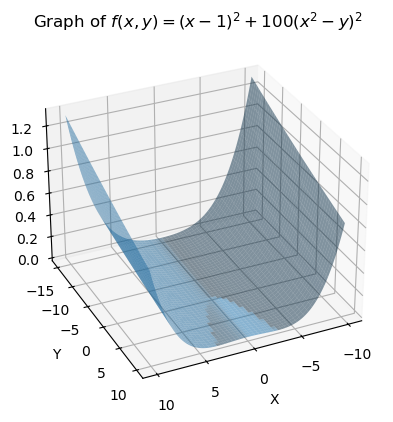

In [ ]:
x = np.linspace(-10, 10, 500)
y = np.linspace(-15, 10, 500)

X, Y = np.meshgrid(x, y)
lambda_f = sp.lambdify(['x','y'], function, 'numpy')

Z = (X - 1)**2 + 100 * (Y - X**2)**2

ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=65)
ax.plot_surface(X, Y, Z, alpha=0.5, shade=True)

ax.set(
    xlabel='X',
    ylabel='Y',
    zlabel='Z',
    title='Graph of $f(x,y) = (x-1)^2 + 100(x^2 - y)^2$'
)
plt.show()

### Puntos sobre la superficie

Luego de probar diferentes configuraciones sobre la orientación de la gráfica se obtuvo la que se observa en la siguiente celda. En esta se puede ver claramente el recorrido que hizo este algoritmo para hallar el punto optimo. El punto en verde es el punto de partida y el punto rojo es el punto final que logro obtener el método de Newton-Raphson.

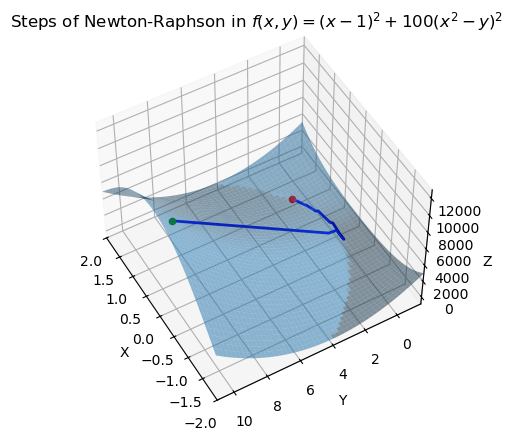

In [ ]:
x = np.linspace(-2, 2, 200)
y = np.linspace(-1.5, 11, 200)

X, Y = np.meshgrid(x, y)
lambda_f = sp.lambdify(['x','y'], function, 'numpy')

Z = (X - 1)**2 + 100 * (Y - X**2)**2

ax = plt.axes(projection='3d')
ax.view_init(elev=50, azim=150)
ax.plot_surface(X, Y, Z, alpha=0.5, shade=True)

x_points = [x[0] for x in steps]
y_points = [x[1] for x in steps]
z_points = [lambda_f(*list(x)) for x in steps]

ax.plot(x_points[:-2], y_points[:-2], z_points[:-2], color='blue', linewidth=2)
ax.scatter(x_points[-2:-1], y_points[-2:-1], y_points[-2:-1], color='red')
ax.scatter([0], [10], [lambda_f(0, 10)], color='green')

ax.set(
    xlabel='X',
    ylabel='Y',
    zlabel='Z',
    title='Steps of Newton-Raphson in $f(x,y) = (x-1)^2 + 100(x^2 - y)^2$',
    xlim=(-2,2),
    ylim=(-1.5,11)
)
plt.show()

### Convergencia hacia el mínimo conocido

Se sabe que el mínimo conocido de la función es $(1,1)$ y según el resultado obtenido en el punto anterior se puede concluir que efectivamente se llego al punto óptimo. (**TODO**)

## Parte b: Función en 4D

Para este problema, decidimos utilizar la función objetivo de regresión lineal con dos variables explicativas ($x_{1k}$ y $x_{2k}$ para un $k \in \{1, 2, \dots, n\}$) dada por:

$$
f(w_1, w_2, b) = \frac{1}{n}\sum_{i = 1}^{n} (y_i - (w_1 x_{1i} + w_2 x_{2i} + b)) ^2
$$

Para esto es necesario un conjunto de datos, por lo tanto, se opta por generar un conjunto de datos de manera aleatoria en la siguiente celda para hallar el optimo global de esta función.

In [ ]:
import pandas as pd

np.random.seed(42)
n = 580

x1 = np.random.uniform(0, 1, n)
x2 = np.random.uniform(0, 1, n)
b = np.random.uniform(0, 1, n)

y = 23.45 * x1 - 12.23 * x2 + b
y_trans = (y - np.min(y))/(np.max(y) - np.min(y))

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y_trans})

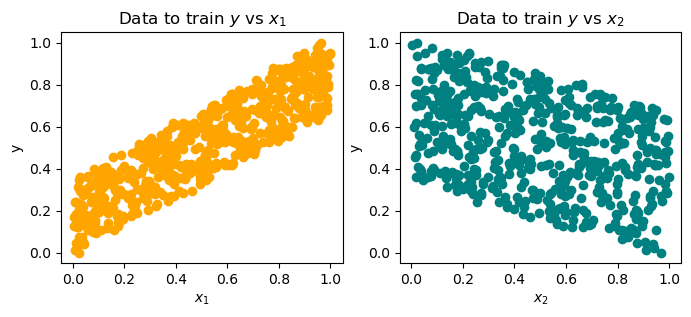

In [ ]:
fig, axis = plt.subplots(1,2, figsize=(8,3))

axis[0].set(title='Data to train $y$ vs $x_1$', xlabel='$x_1$', ylabel='y')
axis[1].set(title='Data to train $y$ vs $x_2$', xlabel='$x_2$', ylabel='y')

axis[0].scatter(x1, y_trans, color='orange')
axis[1].scatter(x2, y_trans, color='teal')

plt.show()

## Formulación del algoritmo de Newton-Raphson en $\mathbb{R}^4$

Se quiere minimizar $f(x,y,z)$. Para lo cual se usa la expansión de Taylor de segundo orden $\nabla f(x) \approx \nabla f(x_0) + H(x_0)(x - x_0)$ en el cual $\nabla f(x)$ es el gradiante y $H(x)$ es la matriz Hessiana. De igual manera, la actualización que se debe llevar a cabo es $x_{k +1} = x_k - H(x_k)^{-1} \nabla f(x_k)$. 

El pseudocódigo es el siguiente:

Entrada:  
- Tolerancia $ \epsilon $
- Máximo de iteraciones
- Factor de paso $\alpha$
- Valor inicial $(x_0, y_0, z_0)$

1. Inicializar $i = 1$
2. Mientras $ ||\nabla f(x,y,z)|| > \epsilon $ y no se excedan el número de iteraciones:

    1. Calcular el gradiente $ \nabla f(x,y,z) $
    2. Calcular la Hessiana (esta es la misma para todo el proceso de optimización en regresión lineal) $ H(x,y,z) $
    3. Resolver y actualizar: $x_{i+1} = x_{i} -  H^{-1}(f(w_1, w_2, b) \nabla f(w_1, w_2, b)$
    4. Actualizar $i = i + 1$

4. Retornar el último punto optimo


## Definición del criterio de parada basado en la norma del gradiente

El criterio de parada basado en la norma del gradiente sería que este valor no exceda el valor de tolerancia definida en los parámetros de la función. Es un poco redundante, pero se usará la norma $L_2$ para definir este factor de parada, tal y como se define en la siguiente formula.

$$
|| \nabla f(x,y,z) || = \sqrt{f_{w_1}^2 + f_{w_2}^2 + f_{b}^2 } > \epsilon
$$

Además, se utilizará como criterio de parada que no se exceda de un límite máximo de iteraciones, en dado caso que el algoritmo no sea capaz de converger a un punto optimo. 

## Calculo analitico del gradiente y la matriz Hessiana de la función propuesta

Dado que $f(w_1, w_2, b)$ para obtener el gradiente se realizan las derivadas parciales respecto a cada una de las variables independientes.

$$
\nabla f(w_1, w_2, b) =
\begin{pmatrix}
\frac{\partial f}{\partial w_1} \\
\frac{\partial f}{\partial w_2} \\
\frac{\partial f}{\partial b}
\end{pmatrix}
=\begin{pmatrix}
    -\frac{2}{n} \sum_{i = 1}^n x_{1i} ( y_i - (w_1 x_{1i} + w_2 x_{2i} + b)) \\
    -\frac{2}{n} \sum_{i = 1}^n x_{2i} ( y_i - (w_1 x_{1i} + w_2 x_{2i} + b)) \\
    -\frac{2}{n} \sum_{i = 1}^n ( y_i - (w_1 x_{1i} + w_2 x_{2i} + b))
\end{pmatrix}
$$

Asimismo, la matriz hessiana con las derivadas parciales es la siguiente.

$$
H(f(w_1,w_2,b)) = \begin{pmatrix}
f_{w_1 w_1} & f_{w_1 w_2} & f_{w_1 b} \\
f_{w_2 w_1} & f_{w_2 w_2} & f_{w_2 b} \\
f_{b w_1} & f_{b w_2} & f_{b b} 
\end{pmatrix} = \begin{pmatrix}
\frac{2}{n} \sum_{i=1}^{n} x_{1i} ^2 & \frac{2}{n} \sum_{i=1}^n x_{1i} x_{2i} & \frac{2}{n}\sum_{i = 1}^{n}  x_{1i} \\
\frac{2}{n} \sum_{i=1}^n x_{1i} x_{2i} & \frac{2}{n} \sum_{i = 1}^n x_{2i} ^2 & \frac{2}{n} \sum_{i = 1}^n x_{2i} \\
\frac{2}{n}\sum_{i = 1}^{n}  x_{1i} & \frac{2}{n} \sum_{i = 1}^n x_{2i} & \frac{2}{n} \sum_{i = 1}^{n} 1
\end{pmatrix}
$$

## Implementación del método iterativo para funciones tetradimensionales

Una implementación que funciona también para funciones tetradimensionales es la que se definió anteriormente (`newton_raphson2D`), debido a que se definió de manera general utilizando la libreria `Sympy` que calcula las derivadas de manera automatica. Además, es necesario mencionar que la siguiente función es muy especifica ya que se tiene que calcular en base a los datos. Es necesario mencionar que la Hessiana no cambia de iteración en iteración ya que como se ve en el punto anterior esta depende únicamente de los datos. 

In [ ]:
def newton_raphson4D_linear_regression(initial_guess: List[int], tolerance: float, N_max: int, alpha: float, data: pd.DataFrame) -> NewtonRaphson2DTuple:
    """Function to execute the 4D Newton-Raphson to minimize the linear regression equation.

    Args:
        initial_guess (int): The initial guess for the minimum value of the function.
        tolerance (float): The tolerance for the minimum value of the function.
        N_max (int): The maximum number of iterations to be executed.
        alpha (float): The alpha value for the Newton-Raphson method.
        data (pd.DataFrame): DataFrame with the data for training.
        
    Returns:
        NewtonRaphson2DTuple: A tuple containing three values:
            the optimal point, the number of steps, and the sequence of steps.
    """
    # validations
    k = 0
    x = [np.array(initial_guess)]
    
    x1 = data['x1']
    x2 = data['x2']

    n = x1.shape[0]

    hessian = np.array([
        [2 * np.sum(x1 ** 2) / n, 2 * np.sum(x1 * x2) / n, 2 * np.sum(x1) / n],
        [2 * np.sum(x1 * x2) / n, 2 * np.sum(x2 **2) / n, 2 * np.sum(x2) / n],
        [2 * np.sum(x1) / n, 2 * np.sum(x2) / n, 2]
    ])

    if np.linalg.det(hessian) == 0:
        raise ValueError("The matrix has 0 determinant")

    while k < N_max:
        w1, w2, b = x[k]

        gradient = np.array([
            -2 * np.sum(x1 * (y - (w1 * x1 + w2 * x2 + b))) / n,
            -2 * np.sum(x2 * (y - (w1 * x1 + w2 * x2 + b))) / n,
            -2 * np.sum(y - (w1 * x1 + w2 * x2 + b)) / n,
        ])

        if np.linalg.norm(gradient) < tolerance:
            break

        d_k = - alpha * np.linalg.inv(hessian) @ gradient
        x.append(x[k] + d_k)
        k += 1
    
    return x[-1], k, x

En la siguiente celda de código se puede ver la ejecución de la función que utiliza Newton-Raphson para hallar los minimos de la función objetivo para el problema de regresión lineal múltiple. Se puede notar que partiendo desde el punto $(0, 0, 0)$ y definiendo los parámetros del algoritmo se obtienen los mejores valores en tan solo 12 pasos. Algo a tener en cuenta es que los puntos optimos son $w_1 = 23.40$ y $w_2 =-12.25$, que son los mismos que se habían definido inicialmente para generar los datos aleatorios, por lo tanto, se puede ver que el resultado del proceso realizado para hallar el punto optimo es el adecuado.

In [ ]:
x0 = [1, 1, 1]
minimum, n_steps, steps = newton_raphson4D_linear_regression(
    x0,
    tolerance=1e-10,
    N_max=100,
    alpha=0.95,
    data=df
)

In [ ]:
n_steps, minimum

(9, array([ 23.40489699, -12.25952924,   0.53650862]))

Otra manera de revisar que tan bien se ajusta el optimo al modelo es realizar la gráfica en 3D y observar el plano que se quiere estimar y el que se obtiene mediante el proceso de optimización. Una vez se realiza este proceso se llega a la conclusión que los parámetros del plano se aproximan bastante bien debido a que se puede ver como los dos planos se sobrelapan.  

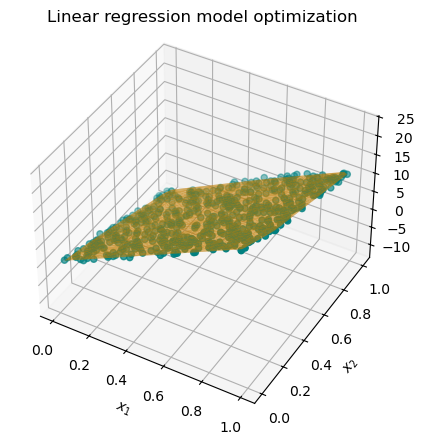

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, color='teal')
ax.plot_trisurf(
    x1, x2, minimum[0] * x1 + minimum[1] * x2 + minimum[2],
    color='orange',
    alpha=0.7
)
ax.view_init(elev=40)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_title('Linear regression model optimization')
plt.show()

## Discusión de las dificultades computacionales específicas del problema

**TODO**

# Problema 4

## Parte A

1. **Definir la función de pérdida:**  
   Se comienza con una función de pérdida generalizada que representa el objetivo de optimización. Por ejemplo:  
   $ L(x, y) = (x - 2)^2 + (y + 1)^2 $

2. **Calcular las derivadas parciales:**  
   Las derivadas parciales de la función respecto a $x$ y $y$ son:
   $
   \frac{\partial L}{\partial x} = 2(x - 2), \quad \frac{\partial L}{\partial y} = 2(y + 1)
   $
   Estas derivadas indican cómo cambia la función de pérdida cuando se modifica cada variable.

3. **Construir el vector gradiente:**  
   El gradiente es un vector que combina las derivadas parciales:
   $
   \nabla L(x, y) = \left[ \frac{\partial L}{\partial x}, \frac{\partial L}{\partial y} \right] = [2(x - 2), 2(y + 1)]
   $

4. **Interpretar el gradiente:**  
   - El gradiente apunta hacia la dirección de máximo incremento de la función de pérdida.
   - Para minimizar la función, es necesario moverse en la dirección opuesta al gradiente.


In [33]:
# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir la función de pérdida
L = (x - 2)**2 + (y + 1)**2

# Calcular las derivadas parciales
dL_dx = sp.diff(L, x)  # Derivada parcial con respecto a x
dL_dy = sp.diff(L, y)  # Derivada parcial con respecto a y

# Mostrar resultados
print("Función de pérdida:", L)
print("Derivada parcial respecto a x:", dL_dx)
print("Derivada parcial respecto a y:", dL_dy)

Función de pérdida: (x - 2)**2 + (y + 1)**2
Derivada parcial respecto a x: 2*x - 4
Derivada parcial respecto a y: 2*y + 2


### 2

In [79]:
def grad_func(x_val, y_val):
    """
    Calcula el gradiente de la función L en un punto dado.

    Args:
        x_val (float): Valor de x.
        y_val (float): Valor de y.

    Returns:
        tuple: Gradiente (dL_dx, dL_dy) evaluado en (x_val, y_val).
    """
    grad_x = dL_dx.subs({'x': x_val, 'y': y_val})
    grad_y = dL_dy.subs({'x': x_val, 'y': y_val})
    return float(grad_x), float(grad_y)

def gradient_descent(x, y, alpha, max_iter, tol):
    """
    Método de descenso de gradiente para minimizar la función objetivo.

    Args:
        alpha (float): Tasa de aprendizaje (step size).
        max_iter (int): Número máximo de iteraciones permitidas.
        tol (float): Tolerancia para la convergencia.

    Returns:
        tuple: Coordenadas del punto óptimo (x, y), cantidad de iteraciones realizadas,
               y trayectoria completa de puntos [(x1, y1), (x2, y2), ...].
    """
    trajectory = [(x, y)]  # Para guardar la trayectoria
    for _ in range(max_iter):
        grad = grad_func(x, y)  # Calcular el gradiente
        x_new, y_new = x - alpha * grad[0], y - alpha * grad[1]  # Actualizar coordenadas
        trajectory.append((x_new, y_new))
        # Condición de convergencia
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        x, y = x_new, y_new  # Actualizar variables
    return x, y, trajectory


Se uso la misma funcion del punto 3 parte A, para poder graficar los pasos que realiza

In [81]:
function = sp.simplify("(x - 2)**2 + (y + 1)**2")
function

(x - 2)**2 + (y + 1)**2

In [83]:
x, y, steps = gradient_descent(-2, -3, 0.1, 1000, 1e-6)

In [84]:
x, y

(1.9999960768114153, -1.0000019615942923)

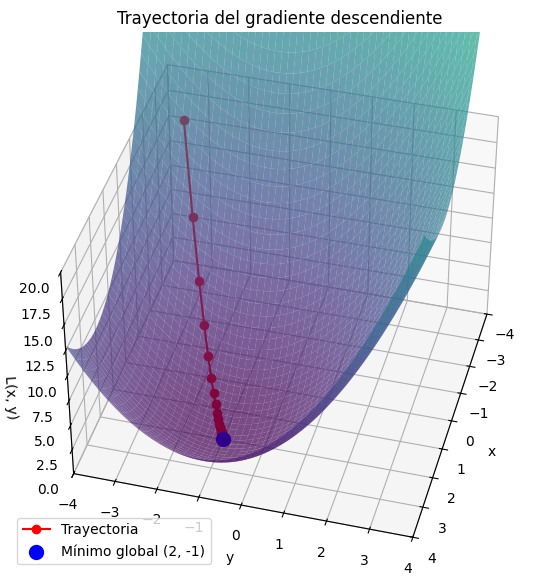

In [85]:
f = sp.lambdify(['x', 'y'], function, 'numpy')
x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)

x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)
z_mesh = (x_mesh - 2)**2 + (y_mesh + 1)**2
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', alpha=0.7)
ax.plot([x[0] for x in steps], [x[1] for x in steps], [f(x[0], x[1]) for x in steps], color='red', marker='o', label='Trayectoria')
ax.scatter(2, -1, 0, color='blue', s=100, label='Mínimo global (2, -1)')

# Etiquetas y título
ax.view_init(elev=40, azim=15)
ax.set(ylim=(-4, 4), xlim=(-4, 4), zlim=(0, 20))
ax.set_title('Trayectoria del gradiente descendiente')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('L(x, y)')
ax.legend()
plt.show()

### 5

El valor óptimo final calculado mediante Gradiente Descendente se aproxima al mínimo global de la función, que analíticamente es $(x, y) = (2, -1)$. La gráfica tridimensional muestra cómo los parámetros se ajustan progresivamente hacia el mínimo global

### 6

- Valores de $\alpha$ pequeños: Convergen lentamente hacia el mínimo global.
- Valores de $\alpha$ grandes: Pueden provocar oscilaciones o no converger.
- Estrategia recomendada: Empezar con un valor moderado, como 0.1, y ajustarlo dependiendo del comportamiento observado durante la optimización.

## Parte B

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import time

# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir la función objetivo
f = (x - 2)**2 * (y + 2)**2 + (x + 1)**2 + (y - 1)**2

# Calcular gradiente y Hessiana
grad_f = [sp.diff(f, var) for var in (x, y)]
hessian_f = [[sp.diff(grad, var) for var in (x, y)] for grad in grad_f]

# Mostrar resultados
print("Gradiente de f:", grad_f)
print("Matriz Hessiana de f:")
for row in hessian_f:
    print(row)

Gradiente de f: [2*x + (2*x - 4)*(y + 2)**2 + 2, 2*y + (x - 2)**2*(2*y + 4) - 2]
Matriz Hessiana de f:
[2*(y + 2)**2 + 2, (2*x - 4)*(2*y + 4)]
[(2*x - 4)*(2*y + 4), 2*(x - 2)**2 + 2]


In [87]:
# Función objetivo para cálculo numérico
def func(x, y):
    return (x - 2)**2 * (y + 2)**2 + (x + 1)**2 + (y - 1)**2

# Gradiente numérico
def grad_func(x, y):
    grad = [2 * (x - 2) * (y + 2)**2 + 2 * (x + 1),
            2 * (x - 2)**2 * (y + 2) + 2 * (y - 1)]
    return np.array(grad)

# Hessiana numérica
def hessian_func(x, y):
    hessian = [[2 * (y + 2)**2 + 2, 4 * (x - 2) * (y + 2)],
               [4 * (x - 2) * (y + 2), 2 * (x - 2)**2 + 2]]
    return np.array(hessian)

# Gradiente Descendente
def gradient_descent(alpha, max_iter=1000, tol=1e-6):
    x, y = -2, -3
    trajectory = [(x, y)]
    for _ in range(max_iter):
        grad = grad_func(x, y)
        x_new, y_new = x - alpha * grad[0], y - alpha * grad[1]
        trajectory.append((x_new, y_new))
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        x, y = x_new, y_new
    return x, y, trajectory

# Newton-Raphson
def newton_raphson(max_iter=1000, tol=1e-6):
    x, y = -2, -3
    trajectory = [(x, y)]
    for _ in range(max_iter):
        grad = grad_func(x, y)
        hess = hessian_func(x, y)
        delta = np.linalg.solve(hess, grad)
        x_new, y_new = x - delta[0], y - delta[1]
        trajectory.append((x_new, y_new))
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        x, y = x_new, y_new
    return x, y, trajectory

## Experimentos con diferentes valores de α para Gradiente Descendente

In [88]:
# Probar con diferentes alphas
alphas = [0.01, 0.1, 0.5]
results_gd = {}

for alpha in alphas:
    start_time = time.time()
    x_opt, y_opt, traj = gradient_descent(alpha)
    exec_time = time.time() - start_time
    results_gd[alpha] = (x_opt, y_opt, len(traj), exec_time)
    print(f"Alpha: {alpha}, Óptimo: ({x_opt:.4f}, {y_opt:.4f}), Iteraciones: {len(traj)}, Tiempo: {exec_time:.4f}s")


Alpha: 0.01, Óptimo: (-0.6181, -1.6181), Iteraciones: 778, Tiempo: 0.0122s
Alpha: 0.1, Óptimo: (0.7866, -0.7866), Iteraciones: 11, Tiempo: 0.0004s
Alpha: 0.5, Óptimo: (nan, nan), Iteraciones: 1001, Tiempo: 0.0115s


C:\Users\laroc\AppData\Local\Temp\ipykernel_15312\3259457493.py:7: RuntimeWarning: overflow encountered in scalar multiply
  grad = [2 * (x - 2) * (y + 2)**2 + 2 * (x + 1),
C:\Users\laroc\AppData\Local\Temp\ipykernel_15312\3259457493.py:8: RuntimeWarning: overflow encountered in scalar multiply
  2 * (x - 2)**2 * (y + 2) + 2 * (y - 1)]
C:\Users\laroc\AppData\Local\Temp\ipykernel_15312\3259457493.py:23: RuntimeWarning: invalid value encountered in scalar subtract
  x_new, y_new = x - alpha * grad[0], y - alpha * grad[1]


Skipping alpha=0.01 due to invalid trajectory shape.
Skipping alpha=0.1 due to invalid trajectory shape.
Skipping alpha=0.5 due to invalid trajectory shape.


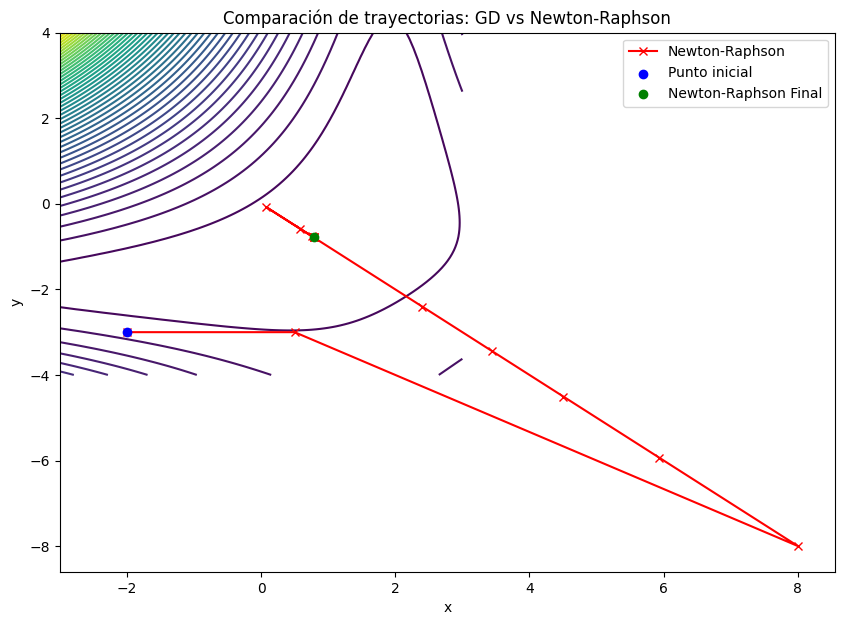

In [89]:
# Ejecutar Newton-Raphson
start_time = time.time()
x_opt_nr, y_opt_nr, traj_nr = newton_raphson()
exec_time_nr = time.time() - start_time

# Graficar contornos y trayectorias
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-4, 4, 100)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)
z_mesh = func(x_mesh, y_mesh)

plt.figure(figsize=(10, 7))

# Mapa de contornos
plt.contour(x_mesh, y_mesh, z_mesh, levels=50, cmap='viridis')

# Trayectorias
for alpha, (_, _, traj, _) in results_gd.items():
    traj = np.array(traj)  # Ensure traj is converted to a 2D array
    if traj.ndim == 2:  # Check if traj is 2-dimensional
        plt.plot(traj[:, 0], traj[:, 1], label=f'GD (α={alpha})', marker='o')
    else:
        print(f"Skipping alpha={alpha} due to invalid trajectory shape.")

traj_nr = np.array(traj_nr)
plt.plot(traj_nr[:, 0], traj_nr[:, 1], label='Newton-Raphson', marker='x', color='red')

# Punto inicial y final
plt.scatter([-2], [-3], color='blue', label='Punto inicial', zorder=5)
plt.scatter([x_opt_nr], [y_opt_nr], color='green', label='Newton-Raphson Final', zorder=5)

plt.title('Comparación de trayectorias: GD vs Newton-Raphson')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

- **Número de iteraciones hasta la convergencia:**
  - Gradiente Descendente depende fuertemente del valor de α; valores pequeños requieren muchas iteraciones.
  - Newton-Raphson converge rápidamente debido al uso de información de la curvatura (Hessiana).

- **Tiempo de ejecución:**
  - Gradiente Descendente es más rápido por iteración, pero puede ser más lento en general debido a la convergencia lenta.
  - Newton-Raphson es más costoso computacionalmente por iteración (inversión de la Hessiana), pero converge en menos iteraciones.

- **Precisión final:**
  - Ambos métodos alcanzan un óptimo similar, aunque Newton-Raphson tiende a ser más preciso en menos iteraciones.

- **Robustez frente a diferentes valores de α:**
  - Gradiente Descendente es muy sensible a α.
  - Newton-Raphson no depende de α.

- **Costo computacional por iteración:**
  - Gradiente Descendente: Bajo (solo requiere el gradiente).
  - Newton-Raphson: Alto (requiere gradiente e inversa de la Hessiana).

Newton-Raphson es más adecuado para este problema específico debido a su rápida convergencia y precisión. Sin embargo, su costo computacional por iteración lo hace menos eficiente para problemas de alta dimensionalidad o cuando la Hessiana es costosa de calcular. En tales casos, el Gradiente Descendente, con una tasa de aprendizaje bien ajustada, puede ser preferible.


In [90]:
# Tabla comparativa como salida en consola
def imprimir_tabla_comparativa(resultados_gd, resultado_nr):
    print("| Método              | Iteraciones | Tiempo (s) | Precisión   | Robustez α | Costo/Iteración |")
    print("|---------------------|-------------|------------|-------------|------------|-----------------|")

    for alpha, (x_opt, y_opt, iteraciones, tiempo) in resultados_gd.items():
        print(f"| Gradiente Descendente (α={alpha}) | {iteraciones:<11} | {tiempo:<10.4f} | Alta        | Baja       | Bajo            |")
    
    x_opt, y_opt, iteraciones_nr, tiempo_nr = resultado_nr
    print(f"| Newton-Raphson      | {iteraciones_nr:<11} | {tiempo_nr:<10.4f} | Muy alta    | N/A        | Alto            |")


# Llamar a la función con los resultados
resultado_nr = (x_opt_nr, y_opt_nr, len(traj_nr), exec_time_nr)
imprimir_tabla_comparativa(results_gd, resultado_nr)


| Método              | Iteraciones | Tiempo (s) | Precisión   | Robustez α | Costo/Iteración |
|---------------------|-------------|------------|-------------|------------|-----------------|
| Gradiente Descendente (α=0.01) | 778         | 0.0122     | Alta        | Baja       | Bajo            |
| Gradiente Descendente (α=0.1) | 11          | 0.0004     | Alta        | Baja       | Bajo            |
| Gradiente Descendente (α=0.5) | 1001        | 0.0115     | Alta        | Baja       | Bajo            |
| Newton-Raphson      | 13          | 0.0020     | Muy alta    | N/A        | Alto            |


Skipping alpha=0.01 due to invalid trajectory type: <class 'int'>
Skipping alpha=0.1 due to invalid trajectory type: <class 'int'>
Skipping alpha=0.5 due to invalid trajectory type: <class 'int'>


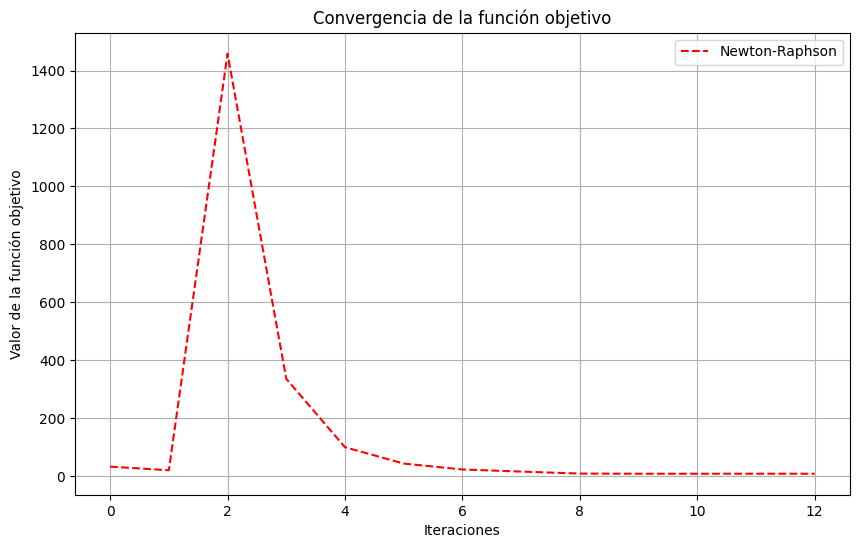

In [93]:
# Graficar convergencia de la función objetivo
plt.figure(figsize=(10, 6))
for alpha, (_, _, traj, _) in results_gd.items():
    if isinstance(traj, (list, np.ndarray)):  # Ensure traj is iterable
        valores_objetivo = [func(x, y) for x, y in traj]
        plt.plot(range(len(traj)), valores_objetivo, label=f'GD (α={alpha})')
    else:
        print(f"Skipping alpha={alpha} due to invalid trajectory type: {type(traj)}")

valores_objetivo_nr = [func(x, y) for x, y in traj_nr]
plt.plot(range(len(traj_nr)), valores_objetivo_nr, label='Newton-Raphson', linestyle='--', color='red')

plt.title('Convergencia de la función objetivo')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de la función objetivo')
plt.legend()
plt.grid(True)
plt.show()


# Problema 5